<a target="_blank" href="https://colab.research.google.com/github/tomas-gajarsky/facetorch/blob/main/notebooks/facetorch_notebook_demo.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Facetorch notebook demo


## Check GPU availability

In [ ]:
# Check GPU availability
!nvidia-smi
# Edit -> Notebook settings -> Hardware accelerator



Mon Sep 16 07:03:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Add cell timer to the notebook

In [ ]:
!pip install ipython-autotime
%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 368 µs (started: 2024-09-16 07:03:21 +00:00)


## Install dependencies

In [ ]:
!python --version
!python -m pip install --upgrade pip
!python -m pip install "facetorch>=0.5.0" "torch==1.13.1+cu117" "torchvision==0.14.1+cu117" "torchaudio==0.13.1" --extra-index-url https://download.pytorch.org/whl/cu117

!pip list | grep facetorch

Python 3.10.12
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=fda2e3a66590ae6fe60f8f8dc8dada086f61ee77e1113f712db9d22d454d721f
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime
  Attempting uninstall: torch
    Found

## Download config and image

In [ ]:
!wget -O ./test.jpg https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
!wget -O ./gpu.config.yml https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/conf/merged/gpu.merged.config.yaml

--2024-09-16 07:06:05--  https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tomas-gajarsky/facetorch/raw/main/data/input/test.jpg [following]
--2024-09-16 07:06:05--  https://github.com/tomas-gajarsky/facetorch/raw/main/data/input/test.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/data/input/test.jpg [following]
--2024-09-16 07:06:06--  https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/data/input/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

## Import packages

In [ ]:
from facetorch import FaceAnalyzer
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision

time: 1.82 s (started: 2024-09-16 07:06:12 +00:00)


## Configure

In [ ]:
path_img_input="./1 (1).jpg"
path_img_output="/1t_output.jpg"
path_config="gpu.config.yml"


cfg = OmegaConf.load(path_config)

time: 104 ms (started: 2024-09-16 07:12:12 +00:00)


## Startup

In [ ]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)

# warmup
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=False,
        include_tensors=True,
        path_output=path_img_output,
    )

{"asctime": "2024-09-16 07:06:18,371", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2024-09-16 07:06:18,373", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2024-09-16 07:06:18,549", "levelname": "INFO", "message": "Initializing FaceDetector"}
Downloading...
From: https://drive.google.com/uc?&id=1eMuOdGkiNCOUTiEbKKoPCHGCuDgiKeNC&confirm=t
To: /opt/facetorch/models/torchscript/detector/1/model.pt
100%|██████████| 110M/110M [00:05<00:00, 19.5MB/s]
{"asctime": "2024-09-16 07:06:28,779", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2024-09-16 07:06:28,798", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2024-09-16 07:06:28,799", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
Downloading...
From: https://drive.google.com/uc?&id=19h3kqar1wlELAmM5hDyj9tlrUh8yjrCl&confirm=t
To: /opt/facetorch/models/torchscript/predictor/embed/1/model.pt
100%|██████████| 11

time: 1min 43s (started: 2024-09-16 07:06:18 +00:00)


## Inference

In [ ]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )

{"asctime": "2024-09-16 07:12:17,656", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-09-16 07:12:17,664", "levelname": "INFO", "message": "Reading image", "input": "./1 (1).jpg"}
{"asctime": "2024-09-16 07:12:17,676", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-09-16 07:12:17,970", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-09-16 07:12:17,971", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-09-16 07:12:17,975", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-09-16 07:12:17,976", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-09-16 07:12:17,992", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2024-09-16 07:12:18,009", "levelname": "INFO", "message": "Running FacePredictor: fer"}
{"asctime": "2024-09-16 07:12:18,032", "levelname": "INFO", "message": "Running FacePredictor: au"}
{"asctime": 

time: 636 ms (started: 2024-09-16 07:12:17 +00:00)


## Output image

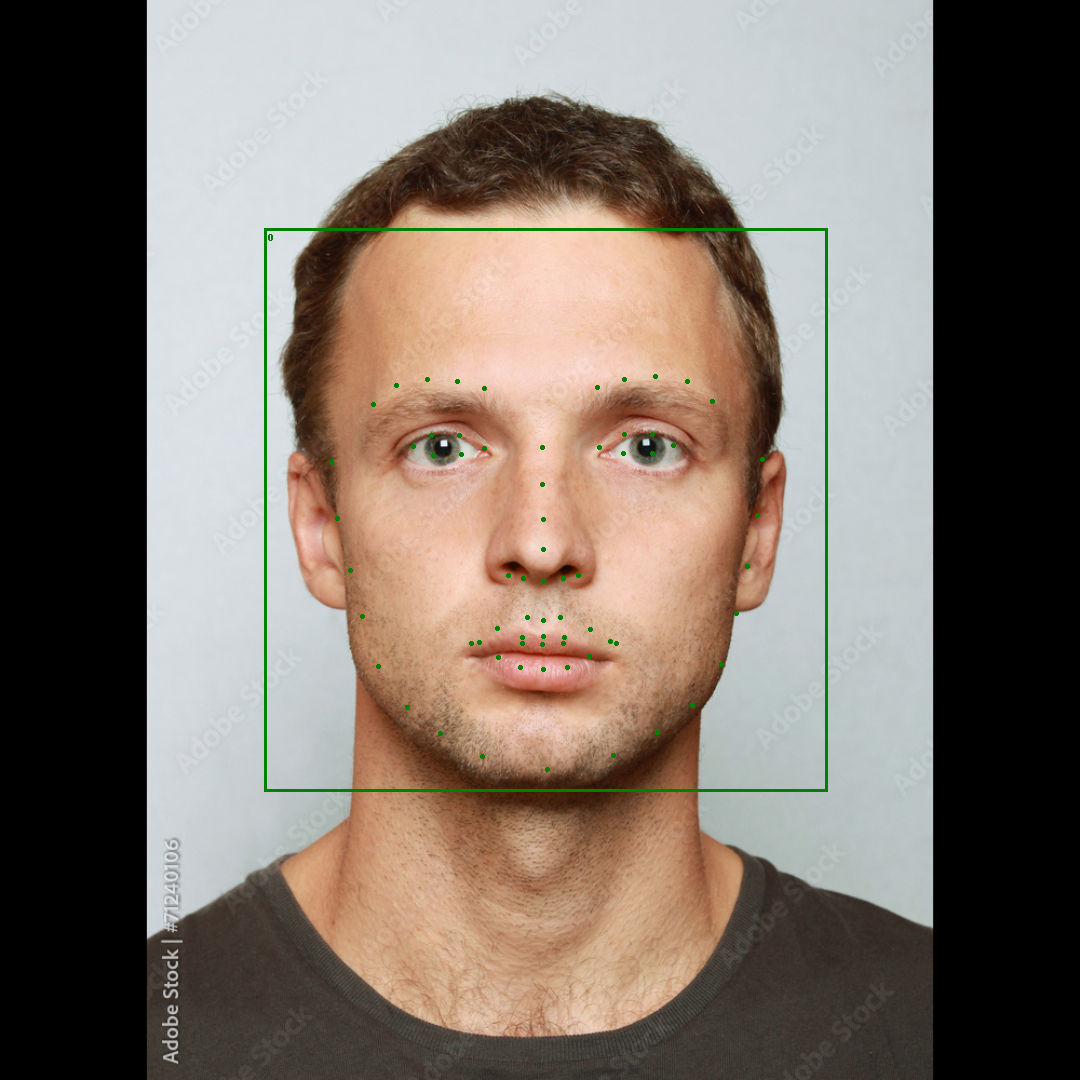

time: 333 ms (started: 2024-09-16 07:12:33 +00:00)


In [ ]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image

## Facial Expressions

In [ ]:
{face.indx: face.preds["fer"].label for face in response.faces}


{0: 'Neutral'}

time: 3.22 ms (started: 2024-09-16 07:12:49 +00:00)


## Facial Action Unit Detection

In [ ]:
{face.indx: face.preds["au"].other["multi"] for face in response.faces}


{0: []}

time: 2.92 ms (started: 2024-09-16 07:12:55 +00:00)


## Facial Valence Arousal

In [ ]:
{face.indx: face.preds["va"].other for face in response.faces}

{0: {'valence': -0.11329936981201172, 'arousal': -0.06646117568016052}}

time: 3.43 ms (started: 2024-09-16 07:13:16 +00:00)


## Embedding cosine similarity

In [ ]:
def compute_embed_similarity(predictor_name: str = "verify", base_face_id: int = 0) -> Dict:
  base_emb = response.faces[base_face_id].preds[predictor_name].logits
  sim_dict = {face.indx: cosine_similarity(base_emb, face.preds[predictor_name].logits, dim=0).item() for face in response.faces}
  sim_dict_sorted = dict(sorted(sim_dict.items(), key=operator.itemgetter(1),reverse=True))
  return sim_dict_sorted

time: 761 µs (started: 2024-09-16 07:13:20 +00:00)


### Face representation learning

In [ ]:
compute_embed_similarity(predictor_name="embed")

{0: 1.0}

time: 8.56 ms (started: 2024-09-16 07:13:22 +00:00)


### Face verification

In [ ]:
compute_embed_similarity(predictor_name="verify")

{0: 1.0000001192092896}

time: 3.15 ms (started: 2024-09-16 07:13:23 +00:00)


## Full response

In [ ]:
response

ImageData(path_input='./1 (1).jpg', path_output='/1t_output.jpg', img=tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), tensor=tensor([[[[-104., -104., -104.,  ..., -104., -104., -104.],
          [-104., -104., -104.,  ..., -104., -104., -104.],
          [-104., -104., -104.,  ..., -104., -104., -104.],
          ...,
          [-104., -104., -104.

time: 57.1 ms (started: 2024-09-16 07:13:24 +00:00)


time: 224 ms (started: 2023-12-14 17:57:59 +00:00)
